In [4]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd '/content/gdrive/MyDrive/LDS6_S7N_TranHoangBach/BaiTap/Chapter_5_KNN'

Mounted at /content/gdrive
/content/gdrive/MyDrive/LDS6_S7N_TranHoangBach/BaiTap/Chapter_5_KNN


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas_profiling as pp
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [6]:
df = pd.read_excel('data/Iris.xls')
label_encoder = LabelEncoder()
df['iris'] = label_encoder.fit_transform(df['iris'])
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = df.drop(columns=['iris'])
y = df['iris']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
def find_k_best_for_knn(X, y):
    from sklearn.model_selection import cross_validate
    from sklearn.neighbors import KNeighborsClassifier
    result = []
    for k in range(1, 11):
        model = KNeighborsClassifier(n_neighbors=k)
        cv_result = cross_validate(model, X, y, cv=10, return_train_score=True, scoring=['r2'])
        result.append([k, cv_result['train_r2'].mean(), cv_result['test_r2'].mean()])
    result = pd.DataFrame(result, columns=['k', 'train_r2', 'test_r2'])
    result.sort_values('test_r2', ascending=False, inplace=True)
    k_best = result.iloc[0, 0]
    print('Best n_neighbors of KNN method is: ', k_best)
    display(result)
    return k_best
k_best = find_k_best_for_knn(X_train, y_train)

Best n_neighbors of KNN method is:  6


,k,train_r2,test_r2
5,6,0.943568,0.917105
2,3,0.926858,0.915132
4,5,0.945108,0.915132
0,1,1.000000,0.902632
3,4,0.942027,0.902632
6,7,0.946652,0.902632
7,8,0.945087,0.902632
8,9,0.943549,0.900658
1,2,0.946676,0.875658
9,10,0.938992,0.875658


In [ ]:
X = df.drop(columns=['iris', 'sepallength', 'sepalwidth'])
y = df['iris']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: iris, Length: 150, dtype: int64

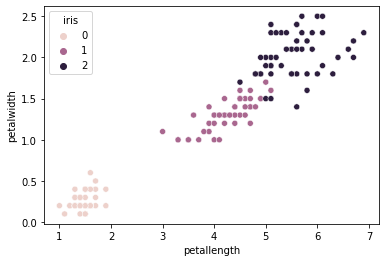

In [ ]:
sb.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y)

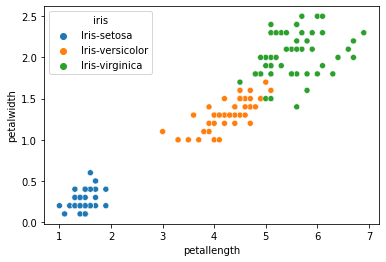

In [ ]:
sb.scatterplot(data=df, x='petallength', y='petalwidth', hue='iris');

In [ ]:
def plot_scatter_with_knn_predictions(model, X, y, label_encoder):
    sb.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y)
    # Prepare X, Y, Z for grid plot
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    XX = np.linspace(x_min, x_max, 300)
    YY = np.linspace(y_min, y_max, 300)
    XX, YY = np.meshgrid(X, Y)
    Z = model.predict(np.c_[X.ravel(), Y.ravel()]).reshape(XX.shape)
    # Z_label = label_encoder.inverse_transform(Z.flatten()).reshape(X.shape)
    # Create KNN Boundary & area color
    plt.contour(XX, YY, Z, linewidth=0.3, label=Z_label)
    plt.contourf(XX, YY, Z, 1, alpha=0.1)
    plt.legend()
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'linewidth', 'label'
  if sys.path[0] == '':


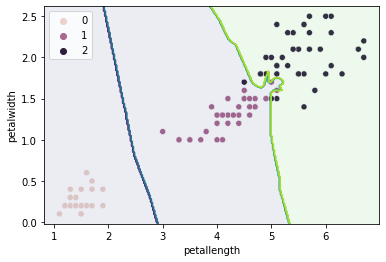

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
plot_scatter_with_knn_predictions(model, X_train, y_train, label_encoder)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


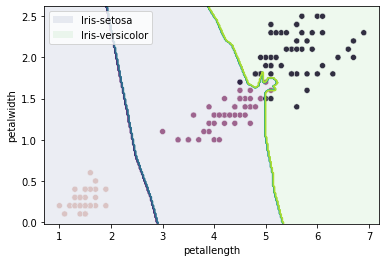

In [ ]:
sc = sb.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y)
# Prepare X, Y, Z for grid plot
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
XX = np.linspace(x_min, x_max, 300)
YY = np.linspace(y_min, y_max, 300)
XX, YY = np.meshgrid(XX, YY)
Z = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
# Z_label = label_encoder.inverse_transform(Z.flatten()).reshape(XX.shape)
# Create KNN Boundary & area color
plt.contour(XX, YY, Z, linewidth=0.3)
cs = plt.contourf(XX, YY, Z, 1, alpha=0.1)
color, lb = cs.legend_elements()
plt.legend(color, label_encoder.classes_)
plt.show()

In [ ]:
label_dict = {i: label for i, label in enumerate(label_encoder.classes_)}
label_dict

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}